In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('DDoS.csv')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(dataset.describe())
dataset.shape

           Dst Port      Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count  1.048574e+06  1.048574e+06   1.048574e+06  1.048574e+06  1.048574e+06   
mean   2.002071e+04  5.999230e+00   2.432653e+06  3.215467e+00  1.655405e+00   
std    2.376548e+04  8.539424e-02   6.177096e+06  1.646481e+00  2.099760e+00   
min    0.000000e+00  0.000000e+00   1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.000000e+01  6.000000e+00   2.462000e+03  2.000000e+00  0.000000e+00   
50%    8.000000e+01  6.000000e+00   4.935100e+04  3.000000e+00  1.000000e+00   
75%    4.437600e+04  6.000000e+00   4.262940e+06  5.000000e+00  3.000000e+00   
max    6.099800e+04  1.700000e+01   1.126418e+08  2.290000e+02  8.890000e+02   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count     1.048574e+06     1.048574e+06     1.048574e+06     1.048574e+06   
mean      4.035506e+02     1.922655e+02     4.028563e+02     4.718790e-03   
std       4.586513e+02     2.183295e+03     4.57

(1048574, 79)

In [3]:
x=dataset.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Label'], axis=1)
y=dataset['Label']
min_max_scaler = preprocessing.MinMaxScaler()
x_data = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_data)
# X = pd.DataFrame(x)
# df=df.astype(float)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(data.head())

         0         1             2         3         4         5         6   \
0  0.000000  0.000000  9.999911e-01  0.008772  0.000000  0.000000  0.000000   
1  0.000000  0.000000  1.000000e+00  0.008772  0.000000  0.000000  0.000000   
2  0.583708  0.352941  1.845154e-01  0.096491  0.049494  0.146035  0.000858   
3  0.000000  0.000000  9.999917e-01  0.008772  0.000000  0.000000  0.000000   
4  0.000377  0.352941  1.686763e-07  0.000000  0.001125  0.000000  0.000000   

         7         8         9        10        11   12        13        14  \
0  0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.000000  0.000000   
2  0.082418  0.213333  0.150578  0.09096  0.007366  0.0  0.015617  0.026018   
3  0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.00000  0.000000  0.0  0.000000  0.000000   

         15            16            17        18 

In [4]:
y=y.replace({'Benign' : 0, 'DoS attacks-Hulk' : 1, 'DoS attacks-SlowHTTPTest' : 1})

In [5]:
chi_scores=chi2(x_data,y)

In [8]:
pvalues=pd.Series(chi_scores[1])
pvalues.index=x.columns
pvalues.sort_values(ascending=False, inplace=True)
# formatted = pvalues.apply(lambda a: '{:.100f}'.format(a))
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pvalues)

Protocol              9.278341e-01
RST Flag Cnt          4.440748e-02
ECE Flag Cnt          4.440748e-02
Active Std            2.872579e-02
Idle Std              2.248368e-02
Active Max            6.297956e-04
Active Min            1.764315e-05
Active Mean           1.566284e-05
Pkt Len Min           6.957071e-06
Fwd Pkt Len Min       2.435685e-06
Bwd Pkt Len Min       2.176865e-06
Fwd IAT Min           1.412471e-06
Flow IAT Min          2.886378e-07
Bwd IAT Min           5.571868e-12
Fwd PSH Flags         5.799587e-17
SYN Flag Cnt          5.799587e-17
Flow Byts/s           7.661681e-24
Subflow Bwd Byts      1.480421e-25
TotLen Bwd Pkts       1.480421e-25
Fwd Seg Size Min     3.437577e-150
FIN Flag Cnt         1.459545e-206
PSH Flag Cnt          0.000000e+00
Down/Up Ratio         0.000000e+00
ACK Flag Cnt          0.000000e+00
URG Flag Cnt          0.000000e+00
Dst Port              0.000000e+00
Subflow Fwd Byts      0.000000e+00
Pkt Size Avg          0.000000e+00
Fwd Seg Size Avg    

<Axes: >

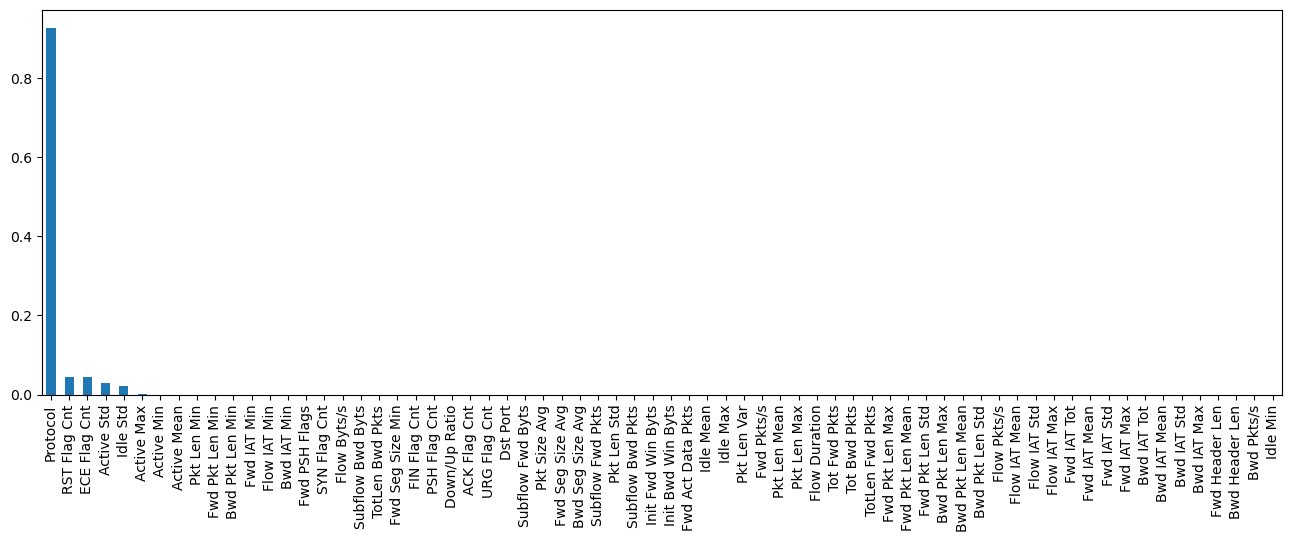

In [9]:
pvalues.plot.bar(figsize = (16,5))